In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import h5py
import pandas as pd
import os.path as osp
import json
from scipy.io import loadmat
import mne
# mat = scipy.io.loadmat("../data/derivatives/RDM/stats_RDM_full.mat")
DATA_PATH = "../data"

ModuleNotFoundError: No module named 'mne'

## Loading Data

Loading participant data

In [3]:
participants_data = pd.read_csv(osp.join(DATA_PATH, "participants.tsv"), sep="\t")
participants_data.head()
print(participants_data.shape)

NameError: name 'pd' is not defined

Understanding what each header means

In [18]:
with open(osp.join(DATA_PATH, "participants.json"), "rb") as f:
    participants_data_meta = json.load(f)
participants_data_meta

{'participant_id': {'Description': 'participant number'},
 'age': {'Description': 'participant age in years at time of acquisition'},
 'gender': {'Description': 'participant self-reported gender (M:Male, F:Female)'},
 'native_english': {'Description': 'Whether the participant was a native English speaker'},
 'language_profile': {'Description': 'Number of languages spoken'},
 'language_spoken_at_home': {'Description': 'Language spoken at home'},
 'exclude': {'Description': '1 for suggested exclusion of participant due to very poor signal or missing data'},
 'note_IZ': {'Description': 'Experimenter notes'}}

Loading a single participants EEG data using the mne package

In [7]:
bv = mne.io.read_raw_brainvision("../data/sub-01/eeg/sub-01_task-rsvp_eeg.vhdr")
bv

Extracting parameters from ../data/sub-01/eeg/sub-01_task-rsvp_eeg.vhdr...
Setting channel info structure...


<RawBrainVision | sub-01_task-rsvp_eeg.eeg, 63 x 3035740 (3035.7 s), ~93 kB, data not loaded>

In [24]:
# extract some useful values
times = bv.times # time values of each sample
N = bv.n_times # sample count
channel_types = bv.get_channel_types()

In [8]:
data = bv.get_data()
data.shape

(63, 3035740)

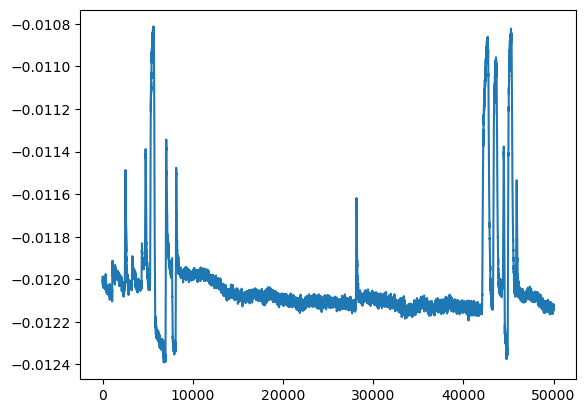

In [28]:
plt.plot(data[0][:50000])

In [1]:
welch_psd = bv.compute_psd()
welch_psd.shape

NameError: name 'bv' is not defined

This is Ethan's contribution. Here is a variable you want to assign for the results: `eeg_spike_results`. It is an array of dictionaries with the count of the EEG spikes.

Right now I only put two entries of two features, as an example.

In [2]:
eeg_spike_results = [{"artificial": 150, "natural": 50}, {"artificial": 100, "natural": 100}]

